<a href="https://colab.research.google.com/github/sandeep1847e/Neural_Network_1/blob/main/Copy_of_NNusingTorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First neural Network**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  #input layers
  def __init__(self,in_features=4,h1=8,h2=9,out_feature=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_feature)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [3]:
torch.manual_seed(41)
model=Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data= pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
data['species'] = data['species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# **training testing and splitting**

In [7]:
x=data.drop('species',axis=1)
y=data['species']


In [8]:
x = x.values
y = y.values


In [9]:
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [10]:
from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(x,y,test_size=0.2,random_state=41)

In [11]:
xtrain=torch.FloatTensor(xtrain)
xtest=torch.FloatTensor(xtest)
ytrain=torch.LongTensor(ytrain)
ytest=torch.LongTensor(ytest)


**error measurement**

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# model.parameters

In [28]:
epochs=100
losses=[]
for i in range(epochs):
  ypred = model.forward(xtrain)

  loss = criterion(ypred,ytrain)
  # print(loss)

  # tracking loss

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epochs : {i} and loss : {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs : 0 and loss : 0.05286576971411705
Epochs : 10 and loss : 0.04508377984166145
Epochs : 20 and loss : 0.03979950025677681
Epochs : 30 and loss : 0.035970721393823624
Epochs : 40 and loss : 0.03293721750378609
Epochs : 50 and loss : 0.030419377610087395
Epochs : 60 and loss : 0.026795225217938423
Epochs : 70 and loss : 0.023382490500807762
Epochs : 80 and loss : 0.02053171582520008
Epochs : 90 and loss : 0.018496563658118248


Text(0.5, 0, 'epochs')

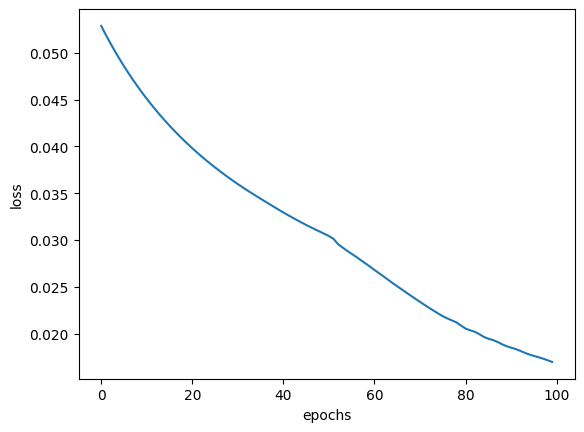

In [29]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [30]:
with torch.no_grad():
  yeval = model.forward(xtest)
  loss = criterion(yeval,ytest)
loss

tensor(0.1816)

In [31]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(xtest):
    yval=model.forward(data)
    print(f'{i+1}.) {str(yval)} \t {ytest[i]}')

    if yval.argmax().item()==ytest[i]:
      correct+=1
f'{correct : }correct'



1.) tensor([-7.1094,  3.8939,  9.0023]) 	 2
2.) tensor([-9.7571,  1.8032, 15.7623]) 	 2
3.) tensor([-10.9679,   2.8771,  16.6049]) 	 2
4.) tensor([-3.7651,  8.0382, -1.2670]) 	 1
5.) tensor([-9.0336,  3.5231, 12.6397]) 	 2
6.) tensor([-1.8252,  8.6930, -5.3406]) 	 1
7.) tensor([-6.8739,  4.9814,  7.3719]) 	 2
8.) tensor([-3.6496,  8.2250, -1.6720]) 	 1
9.) tensor([-7.9286,  4.2582,  9.9591]) 	 2
10.) tensor([-10.4300,   1.8736,  16.8136]) 	 2
11.) tensor([-6.4731,  5.1587,  6.5103]) 	 2
12.) tensor([ 12.4402,   2.4554, -21.9006]) 	 0
13.) tensor([ 11.4201,   2.2030, -19.9097]) 	 0
14.) tensor([-0.1948,  6.9621, -6.0906]) 	 1
15.) tensor([ 10.1552,   3.3046, -19.1049]) 	 0
16.) tensor([-5.9773,  5.7982,  4.9693]) 	 2
17.) tensor([ 11.2076,   2.5239, -19.9613]) 	 0
18.) tensor([-6.8903,  4.2918,  8.1963]) 	 1
19.) tensor([ 12.0349,   2.3649, -21.1218]) 	 0
20.) tensor([  9.6796,   2.7806, -17.7303]) 	 0
21.) tensor([-0.8234,  7.6353, -5.8071]) 	 1
22.) tensor([-10.0607,   2.6571,  15.337

' 28correct'

In [32]:
# model accuracy
accuracy=correct/len(xtest)

print(f'model accuracy : {round(accuracy*100,2)}%')


model accuracy : 93.33%


In [33]:
# using model to predict on our new dataset


In [34]:

newdata=torch.tensor([[5.9,	3.0,	5.1,	1.8]])
with torch.no_grad():
  print(model(newdata).argmax().item())

2


# ***saving our model for future***

In [19]:
torch.save(model.state_dict(),'iri_model.pt')

# **loading our modeule**

In [20]:
irishmodel=Model()
irishmodel.load_state_dict(torch.load('iri_model.pt'))

<All keys matched successfully>

In [21]:
irishmodel.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)